In [9]:
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [10]:
def objective(z):
    p = 0
    #real students to fake students/boundary
    r = 2
    fakeStudents = 0
    fstudents = []
    for i in range(0,class_x-chair_l+1):
        fstudents.append(i)
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_y-chair_l+r)
        fakeStudents = fakeStudents + 2
    for i in range(0,class_y-chair_l+1):
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_x-chair_l+r)
        fstudents.append(i)
        fakeStudents = fakeStudents + 2
    for i in range(1,r):
        fstudents.append(class_x-chair_l+i)
        fstudents.append(-r+i)
        fstudents.append(class_x-chair_l+r-i)
        fstudents.append(class_y-chair_l+i)
        fstudents.append(-i)
        fstudents.append(class_y-chair_l+r-i)
        fstudents.append(-r+i)
        fstudents.append(-i)
        fakeStudents = fakeStudents + 4
        
    #start p computations
    for i in range(len(z)):
        #real to fake students
        for j in range(int(len(fstudents)/2)):
            x1 = z[i][0]
            y1 = z[i][1]
            d1 = z[i][2] 
            x2 = fstudents[j*2]
            y2 = fstudents[j*2+1]
            
            x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
            y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)

            p = p + 8*2**(-.3*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
            p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
            
        #real to real students    
        for j in range(len(z)):
            if i != j:
                #equation
                x1 = z[i][0]
                y1 = z[i][1]
                d1 = z[i][2] 
                x2 = z[j][0]
                y2 = z[j][1]
                
                #depends on angle of first student
                x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
                y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)
                
                p = p + 8*2**(-.3*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
                p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
    return p

def oneObj(x1,y1,d1,x2,y2):
    p = 0
    x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
    y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)
    
    p = p + 8*2**(-.3*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
    p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
    return p

def roundAngle(num):
    n = (num-math.pi/4)/(2*math.pi)
    n = n*8
    n = round(n)%8
    n = int(n*45)
    return n

def addChair():
    #count how many chair positions there are
    available = sum(x.count(1) for x in chair_placement)
    if available <= 0:
        return -1
        
    #rng for which position
    num = math.ceil(random()*available)
    #put at that position
    for i in range(class_y):
        for j in range(class_x):
            if chair_placement[i][j] == 1:
                num = num - 1
            if num == 0:
                x = j
                y = i
                break
        if num == 0:
            break
    
    #randomize direction
    run = 0
    conflict = True
    d = math.floor(random()*8)*45
    while(run < 8 and conflict):
        run = run+1
        conflict = False
        d = (d+45)%360
        for chair in chairs:
            if(oneObj(x,y,d,chair[0],chair[1])) > 2:
                conflict = True
                break
            w = [[x,y,d]]
            if(objective(w)) > 3:
                conflict= True
                break
        
    
    #update classroom
    for i in range(y, y+chair_l):
        for j in range(x,x+chair_l):
            classroom[i][j] = 2
    
    #update chair_placement
    for i in range(class_y):
        for j in range(class_x):
            if math.sqrt((i-y)**2 + (j-x)**2) < 4 or oneObj(x,y,d,j,i) > 3:
                chair_placement[i][j] = 0

    #add chair
    chairs.append([x,y,d])

In [11]:
#set input
students = 10
class_y = 30
class_x = 20
table_long = 4
table_short = 2
table_num = 5
if (table_short > table_long):
    temp = table_short
    table_short = table_long
    table_long = temp
table = [int(table_short),int(table_long)]
chair_l = 2 #make sure 0 index is smaller than 1 index

In [12]:
chairs = []
classroom = [[0 for i in range(class_x)] for j in range(class_y)]
chair_placement = [[1 for i in range(class_x)] for j in range(class_y)]
for i in range(class_y):
    chair_placement[i][class_x-1] = 0       
for j in range(class_x):
    chair_placement[class_y-1][j] = 0  

#adding tables and chairs        
for i in range(students):
    addChair()

obj = objective(chairs)
print(obj)

136.98236777715994


In [13]:
#set up arrays
obj = 81
ran = 0 
while(obj > 80):
    ran = ran+1
    chairs = []
    classroom = [[0 for i in range(class_x)] for j in range(class_y)]
    chair_placement = [[1 for i in range(class_x)] for j in range(class_y)]
    for i in range(class_y):
        chair_placement[i][class_x-1] = 0       
    for j in range(class_x):
        chair_placement[class_y-1][j] = 0  

    #adding tables and chairs        
    for i in range(students):
        addChair()
    
    obj = objective(chairs)
print(ran)
print(obj)

105
67.3202713332726


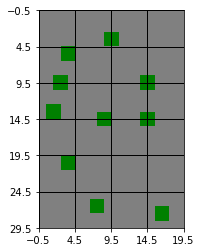

In [14]:
# create discrete colormap
cmap = colors.ListedColormap(['grey','blue','green'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(classroom, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-.5, class_x, 5))
ax.set_yticks(np.arange(-.5, class_y, 5))

plt.show()

In [15]:
print("Chairs: ") 
print(chairs)
for i in range(class_y):
    print(chair_placement[i], end = "\n")
print("\n")

Chairs: 
[[14, 9, 180], [16, 27, 0], [3, 20, 45], [7, 26, 90], [8, 14, 270], [1, 13, 0], [2, 9, 315], [14, 14, 225], [9, 3, 225], [3, 5, 0]]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0